# Final project 
#### Adam Hipp -  ahipp2@uncc.edu  

### Transcriptional Response in Lung Epithelial Tissue 
### in Response to SARS-CoV-2 Infection

#### Import dataset from NCBI --raw read counts 
#### Isolate human counts from ferret counts
#### Isolate epithelial tissue runs (labeled NHBE) from alvelolar tissue (A549)

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


data = pd.read_csv(open("human_counts.tsv",'r'),sep='\t', index_col="Unnamed: 0")

# Data frame for human lung epithelium

lung_epi = data.filter(regex="NHBE")


#Data frame for human lung alveolar
lung_alveolar = data.filter(regex="A549")


lung_epi.shape      # 21797 rows x 24 cols   
lung_alveolar.shape # 21797 rows x 35 cols

# create dataframe for Covid-19 Series of A549 
cols = list(lung_alveolar.columns.values)
covid_counts = lung_alveolar[cols[0:6] + cols[14:20]]

covid_counts

,Series2_A549_Mock_1,Series2_A549_Mock_2,Series2_A549_Mock_3,Series2_A549_SARS-CoV-2_1,Series2_A549_SARS-CoV-2_2,Series2_A549_SARS-CoV-2_3,Series5_A549_Mock_1,Series5_A549_Mock_2,Series5_A549_Mock_3,Series5_A549_SARS-CoV-2_1,Series5_A549_SARS-CoV-2_2,Series5_A549_SARS-CoV-2_3
DDX11L1,0,0,0,0,1,1,0,0,0,0,0,0
WASH7P,68,43,33,65,79,48,64,53,37,38,47,65
FAM138A,0,0,0,0,0,0,0,0,0,0,0,0
FAM138F,0,0,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
CDY1B,0,0,0,0,0,0,0,0,0,0,0,0
CDY1,0,0,0,0,0,0,0,0,0,0,0,0
CSPG4P1Y,0,0,0,0,0,0,0,0,0,0,0,0
GOLGA2P3Y,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
top_counts = covid_counts

#### Save data frame to a csv file so it can be used in R studio

In [3]:
## Use covid_counts.csv for analysis in R
#covid_counts.to_csv("covid_counts.csv")

#Filtered list of covid counts to attempt a different PCA
#covid_counts.to_csv("cov_counts.csv", index=False)


### DESeq2 results processed in R Studio

In [4]:

summary_stats = pd.read_csv(open("gene_summary.csv", 'r'))
summary_stats

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,CXCL5,6402.996288,-1.084018,0.149358,-7.257866,3.930000e-13,2.730000e-09
1,EREG,786.578908,-2.123900,0.289237,-7.343112,2.090000e-13,2.730000e-09
2,UBE2L6,406.782141,-0.712907,0.102615,-6.947425,3.720000e-12,1.720000e-08
3,EGR1,539.780272,-7.453455,1.138881,-6.544544,5.970000e-11,2.070000e-07
4,STAT1,3068.097535,-0.896538,0.144614,-6.199526,5.660000e-10,1.570000e-06
...,...,...,...,...,...,...,...
21792,CDY1B,0.000000,NaN,NaN,NaN,NaN,NaN
21793,CDY1,0.000000,NaN,NaN,NaN,NaN,NaN
21794,CSPG4P1Y,0.000000,NaN,NaN,NaN,NaN,NaN
21795,GOLGA2P3Y,0.000000,NaN,NaN,NaN,NaN,NaN


### - Remove NaN entries from Dataframe. Sort by log2Fold
### - Create new dataframe by combining the top 25 biggest increases and decreases in log2FoldChange

In [5]:
summary_stats.dropna(axis=0, how="any", inplace=True)

genes = summary_stats.rename(columns={"Unnamed: 0": "Gene"})
genes = genes.loc[genes["padj"] < .01]

expression_change_genes = genes.sort_values(by="log2FoldChange", ascending=False, inplace=False)
expression_frames = [expression_change_genes[:25] , expression_change_genes[-25:]]

top50_genes = pd.concat(expression_frames)

# Saved dataframe to csv file so that genes can be researched with DAVID
#top50_genes.to_csv("top50_genes.csv")
top50_genes

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
65,CDH16,10.303468,3.705285,0.793746,4.668101,3.040000e-06,6.370440e-04
181,CST2,20.789302,3.671564,0.906782,4.049003,5.140000e-05,3.925548e-03
236,ADCY5,26.795685,1.617099,0.416085,3.886465,1.017150e-04,5.961243e-03
283,SERPINA6,38.658785,1.372355,0.364450,3.765554,1.661800e-04,7.932118e-03
80,CIDEC,21.319782,1.342607,0.292250,4.594033,4.350000e-06,7.555370e-04
185,TCN2,119.721950,1.071575,0.265330,4.038656,5.380000e-05,4.014537e-03
321,SLC22A18AS,41.607846,1.050495,0.283533,3.705017,2.113760e-04,9.118062e-03
120,GCAT,23.292022,1.033027,0.238504,4.331271,1.480000e-05,1.702572e-03
245,SLC9A3R1,605.660790,0.939782,0.243300,3.862650,1.121640e-04,6.283469e-03
22,RAP1GAP,569.363890,0.922237,0.167863,5.493998,3.930000e-08,2.370000e-05


### Scatterplot of genes that comprise the top 5 largest  increases and decreases in log2FoldChange

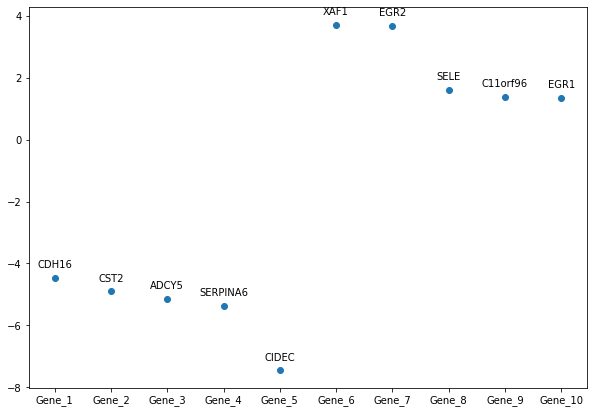

In [12]:
import matplotlib.pyplot as plt

#Create Labels for x-axis
x = []
for i in range(1,11):
    x.append("Gene_" + str(i))

# Data points for y-axis. Top 5 biggest increases/decreases in expression change    
log = top50_genes["log2FoldChange"]
y = list(log)
y = y[-5:] + y[:5]


# Gene names of top 5 biggest increases/decreases in expression change
genes = top50_genes["Gene"]
gene_list = list(genes)
gene_list = gene_list[:5] + gene_list[-5:]

plt.figure(figsize=(10,7))
plt.scatter(x,y)

# Add labels to each data point to indicate gene name
i=0
for x,y in zip(x, y):
    label = gene_list[i]
    
    plt.annotate(label, (x,y), textcoords = "offset points", xytext=(0,10), ha='center')
    i = i+1
    
#ylabel("log2FoldChange")
#ax.set_title("Effect Size Change on Genes")
plt.show()


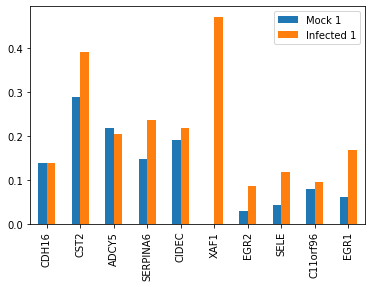

In [7]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

## Select count values for specified genes
top_counts = covid_counts.loc[['CDH16','CST2','ADCY5','SERPINA6','CIDEC','XAF1','EGR2','SELE','C11orf96','EGR1'],:]
top_counts = top_counts

x_c = top_counts.values

### Normalize Counts
normalized_x = preprocessing.normalize(x_c)
df_x = pd.DataFrame(normalized_x, columns = top_counts.columns, index=top_counts.index)

table_1 = df_x.iloc[:,0:3]
table_2 = df_x.iloc[:,3:6]
table_3 = df_x.iloc[:,7:9]
table_4 = df_x.iloc[:,10:12]

## Average gene counts for each sample
table_1 = table_1.T
avg_1 = table_1.describe(include="all").loc['mean']

table_2 = table_2.T
avg_2 = table_2.describe(include="all").loc['mean']

table_3 = table_3.T
avg_3 = table_3.describe(include="all").loc['mean']

table_4 = table_4.T
avg_4 = table_4.describe(include="all").loc['mean']

frame = { "Mock 1": avg_1, "Infected 1": avg_2}
frame_1 = { "Mock 2": avg_3, "Infected 2": avg_4}

df_1 = pd.DataFrame(frame)
df_2 = pd.DataFrame(frame_1)

df_1.plot.bar()


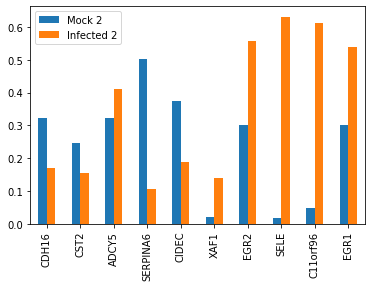

In [8]:
df_2.plot.bar()